In [26]:
# Import required libraries and dependencies

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [27]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.

market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data

market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [28]:
# Generate summary statistics

market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [29]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

scaler = StandardScaler()
bitcoin_scaled = scaler.fit_transform(market_data_df)

In [30]:
# Create a DataFrame with the scaled data

bitcoin_scaled_df = pd.DataFrame(bitcoin_scaled, columns=market_data_df.columns)

# Copy the crypto names from the original data

bitcoin_scaled_df["coin_id"] = market_data_df.index

# Set the coinid column as index

bitcoin_scaled_df = bitcoin_scaled_df.set_index("coin_id")

# Display sample data

bitcoin_scaled_df.head(5)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [31]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k_values = list(range(1, 11))


# Create an empty list to store the inertia values

inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list

for i in k_values:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(bitcoin_scaled_df)
    inertia_values.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve

elbow_data = {"k": k_values, "inertia": inertia_values}
    
# Create a DataFrame with the data to plot the Elbow curve

elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame

elbow_df

c:\Users\mward\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mward\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mward\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mward\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

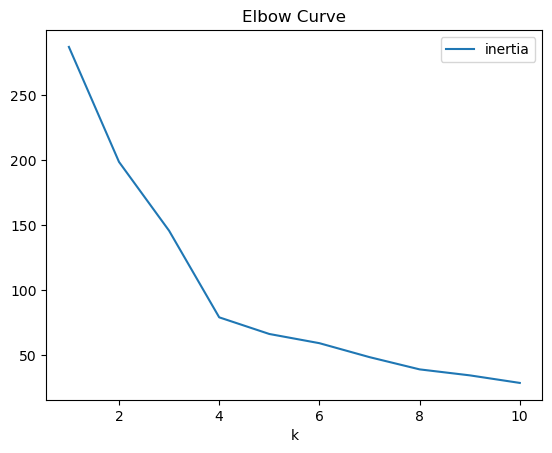

In [32]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

elbow_df.plot.line(x="k", y="inertia", title="Elbow Curve")


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [33]:
# Initialize the K-Means model using the best value for k

model = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [34]:
# Fit the K-Means model using the scaled data

model.fit(bitcoin_scaled_df)

c:\Users\mward\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [35]:
# Predict the clusters to group the cryptocurrencies using the scaled data

predicted_clusters = model.predict(bitcoin_scaled_df)

# View the resulting array of cluster values.

predicted_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [36]:
# Create a copy of the DataFrame

predicted_clusters_df = bitcoin_scaled_df.copy()

In [37]:
# Add a new column to the DataFrame with the predicted clusters

predicted_clusters_df["Cluster"] = predicted_clusters

# Display sample data

predicted_clusters_df.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

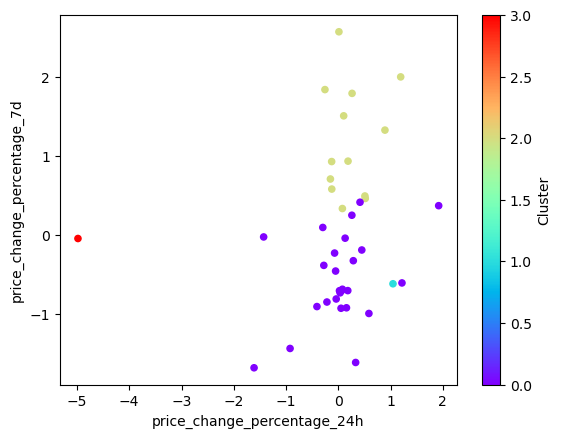

In [38]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

predicted_clusters_df.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d",
                                   c="Cluster", colormap="rainbow")


### Optimize Clusters with Principal Component Analysis.

In [39]:
# Create a PCA model instance and set `n_components=3`.

pca = PCA(n_components=3)


In [40]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.

model_pca = pca.fit_transform(bitcoin_scaled_df)

# View the first five rows of the DataFrame. 

model_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [41]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.

pca.explained_variance_ratio_


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%.

In [42]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data

pca_df = pd.DataFrame(model_pca, columns=["PCA1", "PCA2", "PCA3"])

# Copy the crypto names from the original data

pca_df["coin_id"] = market_data_df.index

# Set the coinid column as index
pca_df = pca_df.set_index(["coin_id"])

# Display sample data
pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [43]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k_values = list(range(1, 11))

# Create an empty list to store the inertia values

inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list

for i in k_values:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(pca_df)
    inertia_values.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve

elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve

elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame

elbow_df


c:\Users\mward\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mward\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mward\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mward\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314
5,6,30.796642
6,7,25.915457
7,8,21.890936
8,9,17.720699
9,10,13.838699


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

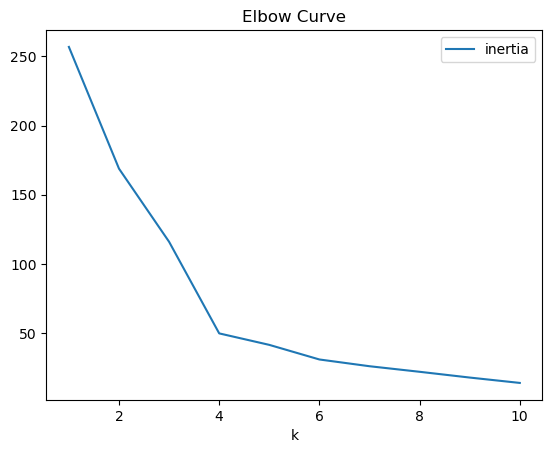

In [44]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

elbow_df.plot.line(x="k", y="inertia", title="Elbow Curve")



#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No. It is the same.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [45]:
# Initialize the K-Means model using the best value for k

model = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [46]:
# Fit the K-Means model using the PCA data

model.fit(pca_df)

c:\Users\mward\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [47]:
# Predict the clusters to group the cryptocurrencies using the PCA data

predicted_clusters = model.predict(pca_df)

# Print the resulting array of cluster values.

print(predicted_clusters)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [48]:
# Create a copy of the DataFrame with the PCA data

predicted_clusters_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters

predicted_clusters_df["Cluster"] = predicted_clusters

# Display sample data

predicted_clusters_df.head(10)


,PCA1,PCA2,PCA3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2
binancecoin,-0.516534,1.388377,0.804071,2
chainlink,-0.450711,0.517699,2.846143,2
cardano,-0.345600,0.729439,1.478013,2
litecoin,-0.649468,0.432165,0.600303,2


<Axes: xlabel='PCA1', ylabel='PCA2'>

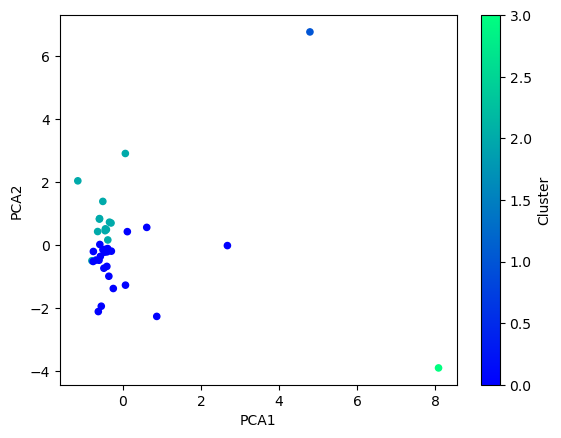

In [49]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 

predicted_clusters_df.plot.scatter(x="PCA1", y="PCA2", c="Cluster", colormap="winter")

### Determine the Weights of Each Feature on each Principal Component

In [50]:
# Use the columns from the original scaled DataFrame as the index.
pca.explained_variance_ratio_

# Display sample data   
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=bitcoin_scaled_df.columns)

pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 

***PCA1:***

price_change_percentage_1y has the strongest positive influence, suggesting it contributes significantly to the first principal component (0.594468).

price_change_percentage_24h has the strongest negative influence, meaning shorter-term price changes inversely impact PCA1 (-0.416728). 

***PCA2:***

price_change_percentage_30d has the strongest positive influence, indicating medium-term price changes are a key factor in PCA2 (0.562182). 

price_change_percentage_1y contributes negatively but weakly compared to PCA1 (-0.150789). 

***PCA3:***

price_change_percentage_7d has a dominant positive influence, highlighting the importance of short-term weekly changes for PCA3 (0.787670). 

price_change_percentage_60d contributes negatively to PCA3, suggesting opposing trends in medium-term changes (-0.361377). 
    